### Задание

#### Цель:

применить на практике базовые ансамблевые методы

#### Описание задания:

В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)

#### Этапы работы:

1. Получите данные и загрузите их в рабочую среду.

2. Подготовьте датасет к обучению моделей.

a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:

a) tree.DecisionTreeClassifier

b) ensemble.RandomForestClassifier

5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.
a) Повторите п. 5

8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.

a) Повторите п. 5

9. Сформулируйте выводы по проделанной работе.

a) Сравните метрики построенных моделей.

b) Напишите свое мнение, какая модель наилучшая и почему.

Для получения зачета по этому домашнему заданию, минимально, должны быть обучены следующие модели: дерево решений, стекинг трех моделей. В данных должны быть обработаны категориальные значения.

Результат: получены знания по использованию базовых ансамблевых методов.

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifierCV

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import classification_report
from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.preprocessing import LabelEncoder

import missingno as msno 

In [2]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
# Разделяем на тренировочные и тестовые данные

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='HeartDisease'),
                                                    df['HeartDisease'],
                                                    test_size=0.2,
                                                    random_state=1984)
X_train.shape, X_test.shape

((734, 11), (184, 11))

In [6]:
categorials = X_train.select_dtypes('object').columns
categorials

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [7]:
# Создаем дамми-переменные для категорий
dummy_train = pd.get_dummies(X_train[categorials], columns=categorials)
dummy_test = pd.get_dummies(X_test[categorials], columns=categorials)

dummy_cols = list(set(dummy_train) & set(dummy_test))

dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]

In [8]:
dummy_train

,ChestPainType_ASY,ChestPainType_NAP,ST_Slope_Up,RestingECG_ST,Sex_F,ChestPainType_TA,ChestPainType_ATA,ExerciseAngina_N,ExerciseAngina_Y,RestingECG_LVH,RestingECG_Normal,Sex_M,ST_Slope_Flat,ST_Slope_Down
432,1,0,0,0,0,0,0,0,1,0,1,1,0,1
189,1,0,0,1,0,0,0,0,1,0,0,1,1,0
630,1,0,0,0,1,0,0,1,0,0,1,0,1,0
391,1,0,0,1,0,0,0,0,1,0,0,1,1,0
308,1,0,1,0,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,1,0,0,0,0,0,0,1,0,0,1,1,1,0
755,1,0,0,0,0,0,0,1,0,1,0,1,1,0
767,0,1,1,0,1,0,0,1,0,1,0,0,0,0
623,1,0,0,0,0,0,0,1,0,1,0,1,1,0


In [9]:
X_train = pd.concat([X_train, dummy_train], axis=1)

X_test = pd.concat([X_test, dummy_test], axis=1)

In [10]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,Sex_F,ChestPainType_TA,ChestPainType_ATA,ExerciseAngina_N,ExerciseAngina_Y,RestingECG_LVH,RestingECG_Normal,Sex_M,ST_Slope_Flat,ST_Slope_Down
432,63,M,ASY,170,177,0,Normal,84,Y,2.5,...,0,0,0,0,1,0,1,1,0,1
189,53,M,ASY,180,285,0,ST,120,Y,1.5,...,0,0,0,0,1,0,0,1,1,0
630,71,F,ASY,112,149,0,Normal,125,N,1.6,...,1,0,0,1,0,0,1,0,1,0
391,70,M,ASY,115,0,0,ST,92,Y,0.0,...,0,0,0,0,1,0,0,1,1,0
308,58,M,ASY,115,0,1,Normal,138,N,0.5,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,67,M,ASY,125,254,1,Normal,163,N,0.2,...,0,0,0,1,0,0,1,1,1,0
755,64,M,ASY,145,212,0,LVH,132,N,2.0,...,0,0,0,1,0,1,0,1,1,0
767,54,F,NAP,108,267,0,LVH,167,N,0.0,...,1,0,0,1,0,1,0,0,0,0
623,60,M,ASY,140,293,0,LVH,170,N,1.2,...,0,0,0,1,0,1,0,1,1,0


In [11]:
X_train = X_train.drop(categorials, axis=1)
X_test = X_test.drop(categorials, axis=1)
# удаление начальных категориальных признаков

In [12]:
X_train.shape

(734, 20)

In [13]:
# сначала вырастим одиночное дерево
dt = DecisionTreeClassifier(random_state=20, max_depth=20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=20)

In [14]:
print(f'accuracy на обучении {dt.score(X_train, y_train):.4f}')
print(f'accuracy на тесте {dt.score(X_test, y_test):.4f}')

accuracy на обучении 1.0000
accuracy на тесте 0.7826


In [15]:
y_pred = dt.predict (X_test)

In [16]:
print(f'Отчет о классификации DecisionTreeClassifier \n {classification_report(y_test, y_pred)}')

Отчет о классификации DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.74      0.78      0.76        81
           1       0.82      0.79      0.80       103

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.78      0.78      0.78       184



In [17]:
# Создаем модель RandomForest
clf_rf = RandomForestClassifier(random_state=1984)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1984)

In [18]:
# проверяем полученные данные на тренировочных данных

clf_rf.score(X_train, y_train)

1.0

In [19]:
# проверяем полученные данные на тестовых данных

clf_rf.score(X_test, y_test)

0.907608695652174

In [20]:
imp = pd.Series(clf_rf.feature_importances_)

In [21]:
imp.index = pd.Series(X_train.columns)

In [22]:
imp = imp.sort_values(ascending=False)
imp

ST_Slope_Up          0.142313
MaxHR                0.097740
Oldpeak              0.091031
Cholesterol          0.090801
ST_Slope_Flat        0.086893
ChestPainType_ASY    0.081145
Age                  0.078316
RestingBP            0.069637
ExerciseAngina_N     0.056790
ExerciseAngina_Y     0.050110
Sex_M                0.028678
Sex_F                0.024781
FastingBS            0.021536
ChestPainType_ATA    0.020200
RestingECG_LVH       0.013269
ChestPainType_NAP    0.013175
RestingECG_Normal    0.011984
RestingECG_ST        0.009132
ChestPainType_TA     0.006937
ST_Slope_Down        0.005533
dtype: float64

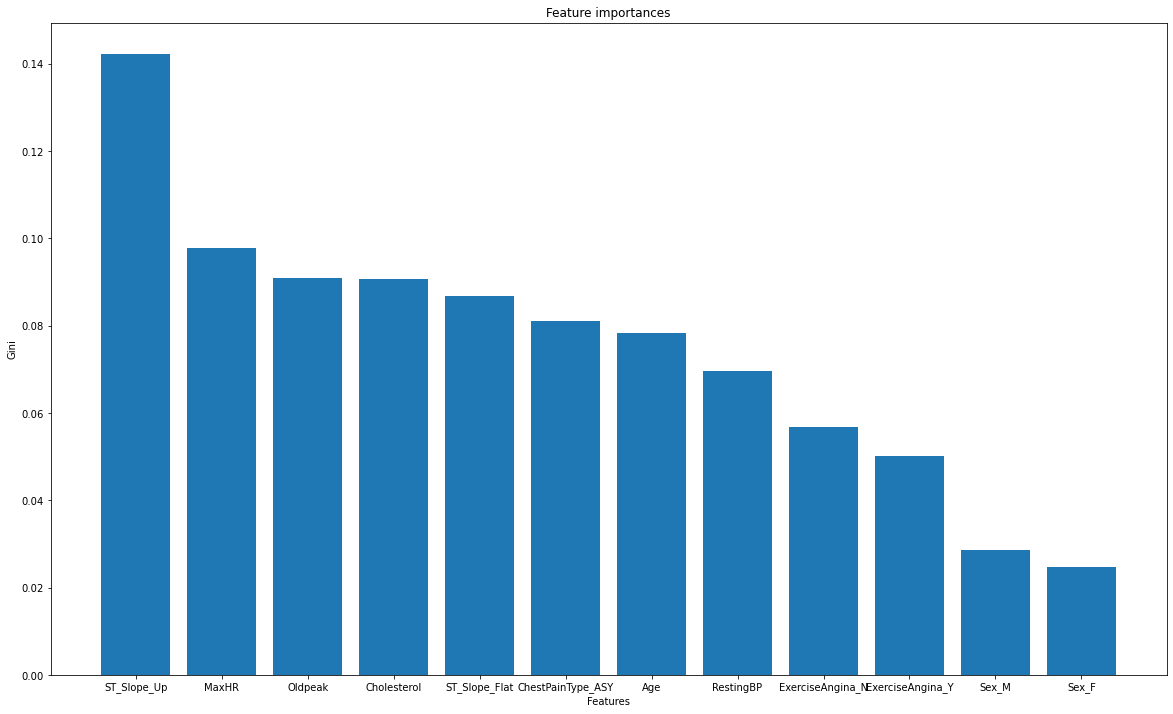

In [23]:
plt.figure(figsize=(20,12))
plt.title('Feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.head(12).index, imp.head(12))
plt.show()
# Выявляем наиболее важные признаки и выводим на график.
# Большое значение имеет признак ST_Slope_Up, далее можно считать важными еще 7 признаков.
# Последующие уже менее половины от самого важного

In [24]:
y_pred_rf = clf_rf.predict (X_test)

In [42]:
print(f'Отчет о классификации RandomForestClassifier \n {classification_report(y_test, y_pred_rf)}')

Отчет о классификации RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        81
           1       0.90      0.94      0.92       103

    accuracy                           0.91       184
   macro avg       0.91      0.90      0.91       184
weighted avg       0.91      0.91      0.91       184



In [26]:
bagging = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=10,
                           max_samples=0.5,
                           max_features=0.5,
                           random_state=10)

In [27]:
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=0.5,
                  max_samples=0.5, random_state=10)

In [28]:
bagging.score(X_train, y_train)

0.9455040871934605

In [29]:
bagging.score(X_test, y_test)

0.8967391304347826

In [30]:
y_pred_b = bagging.predict (X_test)

In [43]:
print(f'Отчет о классификации BaggingClassifier \n {classification_report(y_test, y_pred_b)}')

Отчет о классификации BaggingClassifier 
               precision    recall  f1-score   support

           0       0.89      0.88      0.88        81
           1       0.90      0.91      0.91       103

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184



In [32]:
# Попробую перед ансамблированием запустить модель Опорных векторов. 
clf_SVC = LinearSVC(random_state=0)
clf_SVC.fit(X_train, y_train)

C:\Users\Johan.DESKTOP-53JNTRO.000\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0)

In [33]:
clf_SVC.score(X_train, y_train)

0.6893732970027248

In [34]:
clf_SVC.score(X_test, y_test)

0.7445652173913043

In [44]:
stack_classifier = StackingClassifier(
    [
        ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=20, max_depth=20)),
        ('RandomForestClassifier', RandomForestClassifier(random_state=1984)),
        ('LinearSVC', LinearSVC(random_state=0))
    ], RidgeClassifierCV([2, 10, 20]))

In [45]:
stack_classifier.fit(X_train, y_train)

C:\Users\Johan.DESKTOP-53JNTRO.000\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Johan.DESKTOP-53JNTRO.000\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Johan.DESKTOP-53JNTRO.000\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Johan.DESKTOP-53JNTRO.000\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Johan.DESKTOP-53JNTRO.000\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Johan.DESKTOP-53JNTRO.000\anaco

StackingClassifier(estimators=[('DecisionTreeClassifier',
                                DecisionTreeClassifier(max_depth=20,
                                                       random_state=20)),
                               ('RandomForestClassifier',
                                RandomForestClassifier(random_state=1984)),
                               ('LinearSVC', LinearSVC(random_state=0))],
                   final_estimator=RidgeClassifierCV(alphas=[2, 10, 20]))

In [46]:
y_pred_st = stack_classifier.predict (X_test)

In [47]:
stack_classifier.final_estimator_.alpha_ 

2

In [48]:
for i in stack_classifier.named_estimators:
    print(f'Score on train  with model {i} {stack_classifier.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test  with model {i} {stack_classifier.named_estimators_[i].score(X_test, y_test)}')

Score on train  with model DecisionTreeClassifier 1.0
Score on test  with model DecisionTreeClassifier 0.782608695652174
Score on train  with model RandomForestClassifier 1.0
Score on test  with model RandomForestClassifier 0.907608695652174
Score on train  with model LinearSVC 0.6893732970027248
Score on test  with model LinearSVC 0.7445652173913043


In [41]:
print(f'Отчет о классификации DecisionTreeClassifier \n {classification_report(y_test, y_pred)}')
print(f'Отчет о классификации RandomForestClassifier \n {classification_report(y_test, y_pred_rf)}')
print(f'Отчет о классификации BaggingClassifier \n {classification_report(y_test, y_pred_b)}')
print(f'Отчет о классификации StackingClassifier \n {classification_report(y_test, y_pred_st)}')

Отчет о классификации DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.74      0.78      0.76        81
           1       0.82      0.79      0.80       103

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.78      0.78      0.78       184

Отчет о классификации RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        81
           1       0.90      0.94      0.92       103

    accuracy                           0.91       184
   macro avg       0.91      0.90      0.91       184
weighted avg       0.91      0.91      0.91       184

Отчет о классификации BaggingClassifier 
               precision    recall  f1-score   support

           0       0.89      0.88      0.88        81
           1       0.90      0.91      0.91       103

    accuracy                           0.90   

#### Вывод: 
Ансамблированные модели показали схожие результаты с небольшими отклонениями. 

Все они лучше отработали, чем одиночное дерево и одиночный метод Опорных векторов. 